(pde:fem:poisson-1d)=
# 1-dimensional Poisson equation

## Strong form of the problem

$$
  -\left( \nu u'(x) \right)' = f(x) \quad , \qquad x \in [a, b] 
$$

Supplied with proper boundary conditions. As an example, 
- Dirichlet boundary conditions: $u(\overline{x}) = \overline{u}$
- Neumann boundary conditions: $\nu u'(\overline{x}) = \overline{q}$
- Robin boundary conditions: $a u(\overline{x}) + b u'(\overline{x}) = c$



## Weak form of the problem

For $\forall w(x) \in \mathscr{H}^1([a,b])$[^functional-space] ,

[^functional-space]: Which functional space? It would be nice to be as more precise as possible, without introducing too many "unnecessary" complications. Without going into details, 1) everything appears in the weak form should exists for the functions of that space: here, the functions must have $L^2$-integrable first-order derivative; 2) some results exist when test and unkwown functions belong to the same space: so, some "special" treatment of essential boundary conditions (on Dirichlet boundaries) is required.

$$\begin{aligned}
  0 
  & = \int_{x=a}^b w(x) \left\{ - \left( \nu u'(x) \right)' - f(x) \right\} =  \\
  & = \int_{x=a}^b  w'(x) \nu u'(x) \, dx - \int_{x=a}^b w(x) f(x) \, dx - \left.\left[ w(x) \nu u(x) \right]\right|_{x=a}^b
\end{aligned}$$

Boundary conditions...



### Poisson equation with Dirichlet boundary conditions

By definition, test functions are identically zero on Dirichlet boundary conditions $\left.w\right|_{S_D} = 0$.

Thus the weak form becomes

$$
 \int_{x=a}^b  w'(x) \nu u'(x) \, dx = \int_{x=a}^b w(x) f(x) \, dx \ ,
$$

along with the essential boundary conditions $u(a) = u_a$, $u(b) = u_b$.


#### Finite element method

**Discretization of the domain.** The domain $[a,b] =: \Omega$, is divided into elements $\Omega_i$ s.t.

$$\begin{aligned}
  \cup_i \Omega_i        & = \Omega \\
  \Omega_i \cap \Omega_j & = \emptyset \quad i \ne j
\end{aligned}$$

Exploiting additive property of integrals on the union of domains, integrals of the weak form become summation of integrals on the individual elements

$$\int_{\Omega} \dots = \sum_i \int_{\Omega_i} \dots $$

**Choice of the base functions.** *Lagrangian base functions* (1) $\phi_i(x_j) = \delta_{ij}$, 2) $\phi_i(x) = 0$, if $x \notin B(x_i)$; 3) $\sum_i \phi_i(x) = 1$, $\forall x \in \Omega$) 

$$u(x) = \sum_i \phi_i(x) u_i \ .$$

Definition on a reference element $\xi \in [-1, 1]$ and then change of coordinates between "physical" and reference space to evaluate integrals.

Here, as the maximum order of the derivatives involved in the problem is 1, test functions must be piecewise-*linear* (or better, first degree polynomial) at least, in order to avoid numerically setting to zero some terms in the equation only due to poor approximation (here the term $\int_{x=a}^{b} w'(x) \nu u'(x) dx$ would be zero with piecewise-constant test functions).

First degree-polynomial Lagrangian base functions on the reference elements are

$$\begin{aligned}
  \widetilde{\varphi}_1(\xi) & = \dfrac{1}{2} \left( 1 - \xi \right) \\
  \widetilde{\varphi}_2(\xi) & = \dfrac{1}{2} \left( 1 + \xi \right) \\
\end{aligned}$$

**Evaluation of integrals.** Polynomials functions are exactly evaluated using Gaussian integration, i.e. with a linear combination of the values of the function on a set of Gaussian nodes *x_g*

...

**Analytical exact integration for first degree-polynomial.** The coordinate transformation[^iso-parametric]

[^iso-parametric]: Here, the transformation between physical and reference space is iso-parametric, as it uses the same base functions as those used for function approximations, $x(\xi) = a_i \widetilde{\phi}_1(\xi) + b_i \widetilde{\phi}_2(\xi)$.

$$x = a_i \dfrac{1 - \xi}{2} + b_i \frac{1+\xi}{2} = \frac{a_i + b_i}{2} + \xi \frac{\ell_i}{2} \ ,$$

transforms the reference element into physical elements: e.g. $x(\xi=-1) = a_i$, $x(\xi=1) = b_i$. The Jacobian of this transformation is constant over the element,

$$\frac{d x}{d \xi} = \frac{\ell_i}{2} \ .$$

On the element $i$,

$$\begin{aligned}
  K_{i, 11} 
  & = \int_{x=a_i}^{b_i} \frac{d\phi_1}{dx}(x) \frac{d\phi_1}{dx}(x) \, dx = \\
  & = \int_{\xi=-1}^{\xi=1} \dfrac{d \xi}{d x} \frac{d \widetilde{\phi}_1}{d \xi} \dfrac{d \xi}{d x} \frac{d \widetilde{\phi}_1}{d \xi} \frac{dx}{d \xi} d \xi = \\
  & = \int_{\xi=-1}^{\xi=1} \left(-\frac{1}{2}\right)\left(-\frac{1}{2}\right) d \xi \frac{2}{\ell_i}
    = \frac{1}{\ell_i} \ .
\end{aligned}$$

Analogously,

$$\begin{aligned}
  K_{i, 11} & = K_{i, 22} =   \frac{1}{\ell_i} \\
  K_{i, 12} & = K_{i, 21} = - \frac{1}{\ell_i}
\end{aligned}$$

$$\begin{aligned}
  M_{i,11} 
  & = \int_{x=a_i}^{b_i} \phi_1(x) \phi_1(x) dx = \\
  & = \int_{\xi=-1}^{1} \varphi_1(\xi) \varphi_1(\xi) \frac{dx}{d \xi} d \xi = \\
  & = \int_{\xi=-1}^{1} \left[ \frac{1}{2} \left( 1 - \xi \right) \right]^2 d \xi \frac{\ell_i}{2} = \\
  & = \frac{\ell_i}{8} \left( 2 + \frac{2}{3} \right) = \frac{1}{3}\ell_i \ .
\end{aligned}$$

and analogously

$$\begin{aligned}
  M_{i,11} & = M_{i,22} = \frac{\ell_i}{3} \\
  M_{i,12} & = M_{i,21} = \frac{\ell_i}{6} \\
\end{aligned}$$


In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

#> Domain
a, b = 0, 1
l = b - a

#> Physical properties
nu = .01                       # Diffusion coefficient
f = 1.

#> Discretization
nel = 20            # n.of elements
nnodes = nel + 1
#> Dirichlet boundaries
i_dir = np.array([ 0, nel ])   # Global idx of nodes on Dirichlet boundaries
u_dir = np.array([ .0, .0 ])   # Value of the solution at nodes on Dir. boundaries

#> Volume forcing contribution
f_nodal = np.ones(nel+1) * f   # Nodal values f(x_i) of volume forcing, here uniform f(x) = f

#> Node coordinates array, rr, and element-node connectivity array, ee
rr = np.linspace(a,b, nel+1)
ee = np.array([[i, i+1] for i in np.arange(nel)])
#> Size of the elements
e_vol = np.array([ rr[ee[i,1]] - rr[ee[i,0]] for i in np.arange(nel) ])


In [2]:
#> Assembling stiffenss matrix, mass matrix, and forcing term
#> Stiffness matrix
ki = np.concatenate([[ee[i,0], ee[i,0], ee[i,1], ee[i,1]] for i in np.arange(nel)])
kj = np.concatenate([[ee[i,0], ee[i,1], ee[i,0], ee[i,1]] for i in np.arange(nel)])
ke = np.concatenate([nu * np.array([1., -1., -1., 1.,])/e_vol[i] for i in np.arange(nel)])
K = sp.sparse.coo_array((ke, (ki, kj)),)

#> Mass matrix, here used for integration of the volume force
mi = np.concatenate([[ee[i,0], ee[i,0], ee[i,1], ee[i,1]] for i in np.arange(nel)])
mj = np.concatenate([[ee[i,0], ee[i,1], ee[i,0], ee[i,1]] for i in np.arange(nel)])
me = np.concatenate([np.array([2., 1., 1., 2.,])*e_vol[i]/6. for i in np.arange(nel)])
M = sp.sparse.coo_array((me, (mi, mj)),)

F = M @ f_nodal   # Volume force



Text(0, 0.5, 'f(x)')

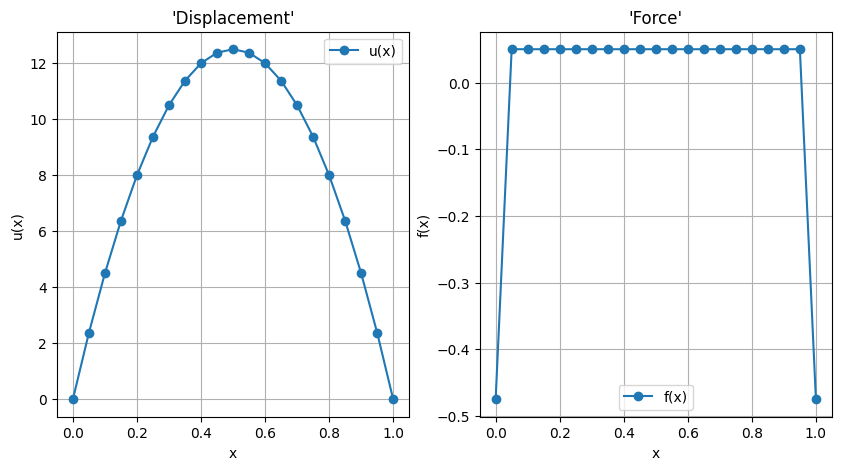

In [3]:
#> Apply essential boundary conditions, solve the linear system and retrieve the solution
#> Method 1. Slicing matrices
# K u = f
# [ Kuu  Kud ] [ uu ] = [ fu ]
# [ Kdu  Kdd ] [ ud ]   [ fd ]
# with known: ud, fu; unknown: uu, fd found solving the problem
# Kuu * uu = fuu - Kud * ud  -> uu = ...
# fd = Kdu * uu + Kdd * ud
iD = i_dir.copy()
iU = np.array(list(set(np.arange(nnodes)) - set(iD)))
ud = u_dir.copy()

#> Slice stiffness matrix
Kuu = (K.tocsc()[:,iU]).tocsr()[iU,:]
Kud = (K.tocsc()[:,iD]).tocsr()[iU,:]
Kdu = (K.tocsc()[:,iU]).tocsr()[iD,:]
Kdd = (K.tocsc()[:,iD]).tocsr()[iD,:]

#> Slice forcing
fu = F[iU]

#> Solve the linear system
uu = sp.sparse.linalg.spsolve(Kuu, fu - Kud @ ud )
fd = Kdu @ uu + Kdd @ ud

#> Re-assemble the solution
u = np.zeros(nnodes);  u[iU] = uu;  u[iD] = ud
f = np.zeros(nnodes);  f[iU] = fu;  f[iD] = fd
# print("uu: \n", uu)
# print("Fd: \n", fd)

#> Plot some results
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(rr, u, '-o', label='u(x)')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\'Displacement\'')
ax[0].set_xlabel('x')
ax[0].set_ylabel('u(x)')
ax[1].plot(rr, f, '-o', label='f(x)')
ax[1].legend()
ax[1].grid()
ax[1].set_title('\'Force\'')
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')


In [4]:
#> Method 2. Augmented system
# ...


$$-\left(\nu \, u'(x) \right)' = f(x) \ , \quad x \in [a,b]$$


**Some comments and todos.**

* **Convergence analysis.** It's possible to evaluate both convergence with the dimension of the elements and/or the degree of the polynomial base functions. The *exact solution* can be easily computed analytically via direct integration for simple distribution of load $f(x)$, and uniform $\nu$
* **Result discussion.** "Force" contribution on Dirichlet boundary conditions involves both the node contribution to distributed load and the "constraint reaction". As an example, with a domain of size $\ell$ and uniform force distribution $f$, with $u(0) = u(\ell) = 0$, by *symmetry* and *global equilibrium* the force at boundaries are $-\frac{1}{2} q \ell = - \frac{1}{2}$. With the modelling choices done, the contribution of the uniform distributed load on an element on any of its nodes is $\frac{1}{2} q \ell_i = \frac{1}{2} q \frac{\ell}{n_{el}}$. Here with $n_{el} = 20$, this elementary contribution is $\frac{1}{40} = .025$: thus, the nodal contribution of internal nodes is twice (contribution from two neighboring elements) this value $.05$, and the force on each Dirichlet boundary is $-\frac{1}{2} + \frac{1}{40} = - 0.475$.
* Try to set different values of Dirichlet boundary conditions, u_dir